In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [14]:
# Load Zillow Data cleanedin csv

filen = "Zillow_data_cleaned_NC.csv"

#cm_pric_df = pd.read_csv(filen, encoding="utf-8")

cm_pric_df = pd.read_csv(filen, encoding="utf-8")

cn = cm_pric_df.columns


In [15]:
# Select only the columns including "Price" from datafram
cprice = cm_pric_df.filter(regex="Price")
cprice['Dates'] = cm_pric_df['Dates']
cprice1 = cprice.set_index("Dates")
cprice2 = cprice1.sort_values(by= "2019-05", axis=1, ascending=False, inplace=False, kind='quicksort')
cprice2.head()

C:\Users\asi40\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Chatham CountyPrice,Dare CountyPrice,Orange CountyPrice,Jackson CountyPrice,Transylvania CountyPrice,Buncombe CountyPrice,Currituck CountyPrice,Hyde CountyPrice,Watauga CountyPrice,Polk CountyPrice,...,Rockingham CountyPrice,Halifax CountyPrice,Scotland CountyPrice,Lenoir CountyPrice,Robeson CountyPrice,Richmond CountyPrice,Washington CountyPrice,Bertie CountyPrice,Martin CountyPrice,Edgecombe CountyPrice
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01,339000.0,394900,320000,299000.0,342000.0,260000.0,349450.0,NaN,349000.0,350000,...,117700,155950,NaN,125333.0,99000.0,90000.0,NaN,NaN,NaN,74000.0
2010-02,339665.0,389900,324900,299250.0,337000.0,250000.0,339900.0,NaN,339900.0,345000,...,115000,157500,NaN,124900.0,99949.5,93000.0,NaN,NaN,NaN,76500.0
2010-03,320000.0,384900,324900,299900.0,326250.0,249500.0,344900.0,NaN,339000.0,329450,...,118950,161250,NaN,125616.5,99000.0,98950.0,NaN,NaN,NaN,74900.0
2010-04,315000.0,379000,324700,299000.0,324900.0,248750.0,339850.0,NaN,339000.0,327000,...,116900,160000,NaN,119900.0,105000.0,99900.0,NaN,NaN,NaN,75000.0
2010-05,314752.5,374900,329900,350000.0,329000.0,249900.0,329900.0,NaN,335000.0,325000,...,115950,157000,NaN,120000.0,98900.0,93900.0,NaN,NaN,NaN,75000.0


In [16]:
#Describe statistics for 2019-05 across all counties
descr = cprice2.apply(pd.DataFrame.describe, axis=1)
descr.loc["2019-05",:]


count        89.000000
mean     241820.157303
std       84324.201693
min       76900.000000
25%      187250.000000
50%      238950.000000
75%      295990.000000
max      481000.000000
Name: 2019-05, dtype: float64

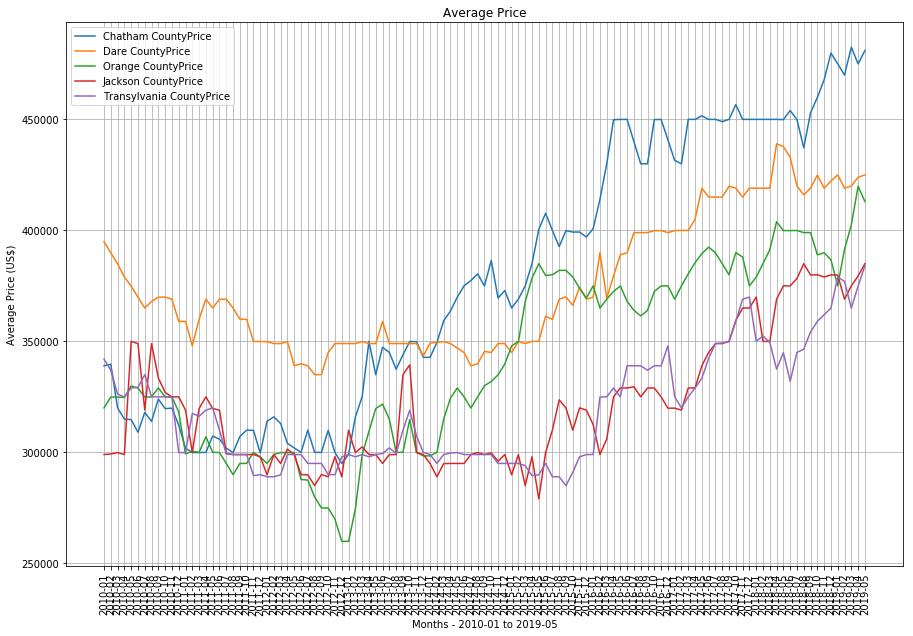

In [17]:
#Graph top 5 counties in North Carolina by average price of property
df2 = cprice2
m2 = list(df2.index.values)
cn = df2.columns

plt.figure(figsize=(15,10))

i = 0
for i in range(0,5):
    plt.plot(m2, df2[cn[i]], label = cn[i])
    plt.legend()
    i +=1

plt.legend(loc="best")
plt.xticks(m2, m2, rotation='vertical')
plt.xlabel("Months - 2010-01 to 2019-05")
plt.ylabel("Average Price (US$)")
plt.title("Average Price")
plt.grid()

plt.show()

In [62]:
# Calculate the average price percent changes from 2010 to 2015

change = []  #List to store the %change for each county

#Calculate %change for each medicine
for county in cn:
    dataC = df2[county]                       #Get tumor volume data for medicine
    change.append((((dataC['2019-05']/dataC['2015-01']))-1)*100)   #Calculate %change for medicine and add to list (change)
    
# Store all Relevant Percent Changes into a Data Frame
priceC = pd.DataFrame({"County": cn, "% Change": change})

# Order from largest to smallest
df_pc = priceC.sort_values(by ='% Change',ascending=False)
df_pc



,County,% Change
16,Catawba CountyPrice,67.8
57,McDowell CountyPrice,58.6
17,Alamance CountyPrice,55.7
19,Rowan CountyPrice,51.2
7,Gaston CountyPrice,50.2
34,Lincoln CountyPrice,48.0
43,Granville CountyPrice,47.7
5,Durham CountyPrice,47.5
42,Stanly CountyPrice,44.9
32,Caldwell CountyPrice,42.9


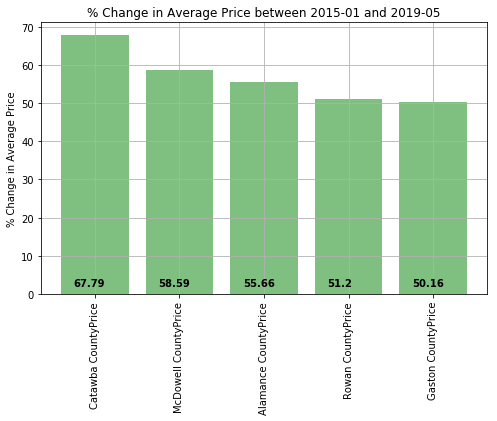

In [19]:
# Orient widths. Add labels, tick marks, etc. 

plt.figure(figsize=(8,5))

i= 0
j = 5
plt.grid()
plt.bar(df_pc['County'][0:5], df_pc["% Change"][0:5], color = 'green', align='center', alpha=0.5)

plt.ylabel('% Change in Average Price')
plt.title('% Change in Average Price between 2015-01 and 2019-05')
plt.xticks(df_pc['County'][0:5], df_pc['County'][0:5], rotation='vertical')

for v in df_pc['% Change'][0:j]:
    plt.text(i-0.25, 2, str(round(v,2)), color='black', fontweight='bold')
    i += 1

plt.show()


In [20]:
pd.options.display.float_format = '{:,.1f}'.format
df_pc.describe()

,% Change
count,78.0
mean,26.8
std,14.6
min,-1.4
25%,17.5
50%,25.9
75%,36.3
max,67.8


In [21]:
# Calculate growth by county by year and plot the top five (based on average price)

obj1 = {}

for county in cn:
    cdata = df2[county]
   
    change1 = []
    current = cdata[0]
    
    #Calculate % change per year, and store values in change1
    for value in cdata:
        if current!=0 :
            change1.append(((value/current)-1)*100)
        else:
            change1.append(0)
        current = value

    obj1[county] = change1

pchange = pd.DataFrame(obj1)
pchange['Dates'] = list(df2.index.values)
pchange1 = pchange.set_index("Dates")


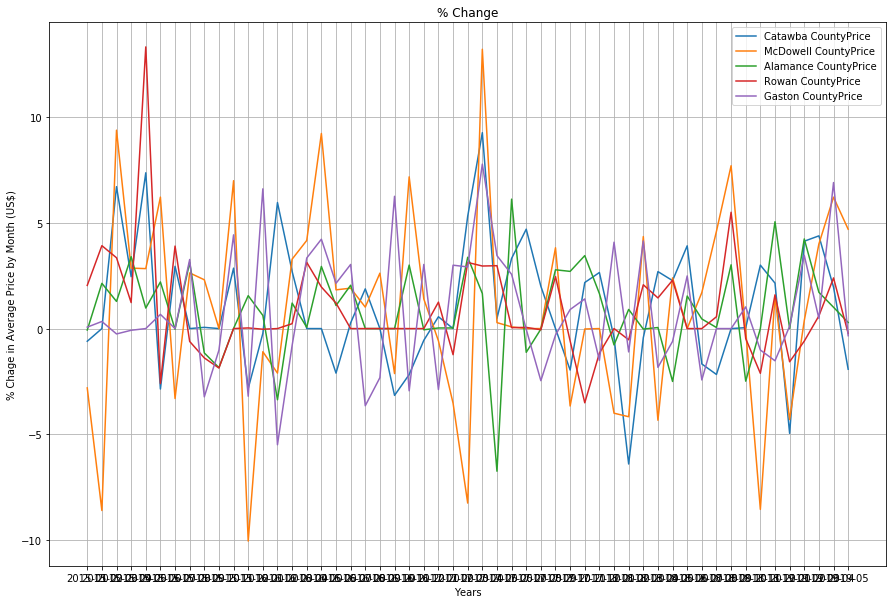

In [63]:
#Line graph for top three counties in growth
cn1 = list(df_pc['County'])

plt.figure(figsize=(15,10))

i = 0
for i in range(0,5):
    plt.plot(df2.index.values[60:], pchange1[cn1[i]][60:], label = cn1[i])
    plt.legend()
    i +=1

plt.legend(loc="best")
plt.xlabel("Years")
plt.ylabel("% Chage in Average Price by Month (US$)")
plt.title("% Change")
#plt.xticks(df2.index.values[69:], df2.index.values[60:], rotation='vertical')
plt.grid()
plt.show()

In [23]:
df3 = cm_pric_df.filter(regex="Sale")
df3.head()

,Mecklenburg CountySale,Wake CountySale,Guilford CountySale,Forsyth CountySale,Cumberland CountySale,Durham CountySale,Buncombe CountySale,Gaston CountySale,Union CountySale,Cabarrus CountySale,...,Washington CountySale,Pamlico CountySale,Gates CountySale,Alleghany CountySale,Clay CountySale,Jones CountySale,Camden CountySale,Graham CountySale,Hyde CountySale,Tyrrell CountySale
0,675,657,272,nan,156,171.0,nan,nan,115,107,...,6,6,3.0,13.0,10,4,1,5,0.0,1
1,759,713,296,nan,202,156.0,nan,nan,133,135,...,4,3,6.0,9.0,7,1,3,6,0.0,3
2,1112,1108,500,nan,269,270.0,nan,nan,191,173,...,4,9,3.0,18.0,11,5,10,4,0.0,1
3,1153,1376,506,nan,303,303.0,nan,nan,251,187,...,8,9,7.0,16.0,5,6,2,10,0.0,0
4,1207,1400,578,nan,342,421.0,nan,nan,233,208,...,6,7,3.0,12.0,9,6,11,3,2.0,1


In [24]:

cn = cprice1.columns
cn1 = cn[1].replace("Price", "")
cn1

'Wake County'

In [25]:
pdata = list(cprice[cn1+"Price"])
sdata = list(df3[cn1+"Sale"])


In [26]:
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(pdata, sdata)

print (slope)
print (intercept)
print (rvalue)
print (pvalue)
print(stderr)


0.005369622026595177
-208.8753223969868
0.6311267136101514
6.719075895436867e-14
0.0006263947609946204


In [27]:
# Calculate the CGR from 2015 to 2019

cgr1 = []  #List to store the %change for each county

#Calculate %change for each medicine
for county in cn:
    dataC = df2[county]                       #Get tumor volume data for medicine
    cgr1.append(((((dataC['2019-05']/dataC['2015-01']))**(1/4))-1)*100)   #Calculate %change for medicine and add to list (change)
    
# Store all Relevant Percent Changes into a Data Frame
cgr_df = pd.DataFrame({"County": cn, "% Change": cgr1})

# Order from largest to smallest
cgr2 = cgr_df.sort_values(by ='% Change',ascending=False)
cgr2.head()


,County,% Change
16,Catawba CountyPrice,13.8
57,McDowell CountyPrice,12.2
17,Alamance CountyPrice,11.7
19,Rowan CountyPrice,10.9
7,Gaston CountyPrice,10.7


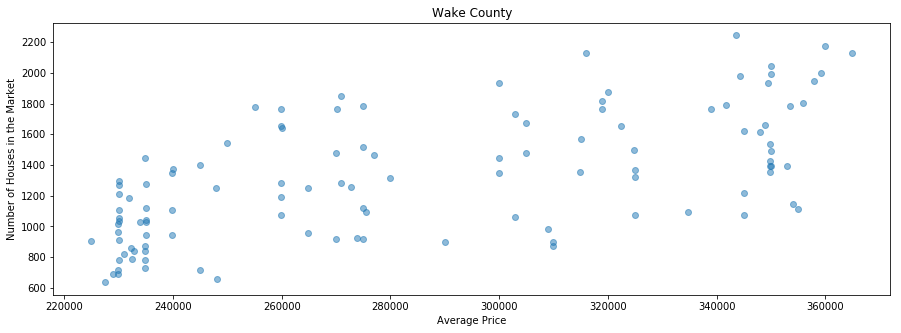

In [28]:
plt.figure(figsize=(15,5))

plt.scatter(pdata, sdata, alpha=0.5)
plt.xlabel('Average Price')
plt.ylabel('Number of Houses in the Market')
plt.title(cn1)
plt.show()


In [29]:
cl1 = cprice1.columns



In [30]:
y = range (2010, 2020)

datay ={}

for y1 in y:
    cur = str(y1)+"-01"
    s1 = list(cprice1.loc[cur])
    if y1 != 2019:
        r = range(2, 13)
        l = 12
    else:
        r = range(2, 6)
        l = 5
    for i in r:
        if i < 10:
            nex = str(y1)+"-0"+str(i)
        else:
            nex = str(y1)+"-"+str(i)
        s1 = list(np.add(s1,list(cprice1.loc[nex])))
    datay[str(y1)] = [x / l for x in s1]

cyear = pd.DataFrame(datay)
cyear['County'] = cl1
cyear1 = cyear.set_index("County").transpose()
cyear1


County,Mecklenburg CountyPrice,Wake CountyPrice,Guilford CountyPrice,Forsyth CountyPrice,Cumberland CountyPrice,Durham CountyPrice,Buncombe CountyPrice,Gaston CountyPrice,New Hanover CountyPrice,Union CountyPrice,...,Chowan CountyPrice,Swain CountyPrice,Perquimans CountyPrice,Washington CountyPrice,Pamlico CountyPrice,Alleghany CountyPrice,Clay CountyPrice,Camden CountyPrice,Graham CountyPrice,Hyde CountyPrice
2010,"188,833.3","238,529.4","156,366.7","153,874.5",nan,"179,057.5","249,312.5","136,616.7","244,716.7","223,742.0",...,nan,"244,566.7","231,133.3",nan,"294,512.0","225,733.3","237,945.8","254,613.7","263,187.5",nan
2011,"176,961.8","229,504.0","148,058.3","144,611.2",nan,"174,265.4","245,150.0","127,645.8","224,304.2","200,223.8",...,nan,"224,275.0","203,795.8",nan,"294,708.3","202,062.5","202,260.7","259,707.8","200,837.5",nan
2012,"182,759.9","232,620.0","143,501.6","145,100.0",nan,"174,238.7","249,300.0","120,587.5","224,975.0","201,298.9",...,nan,"199,883.3","181,916.7",nan,"250,725.0","201,991.7","183,797.9","227,977.1","183,462.5",nan
2013,"206,931.2","254,350.8","148,148.3","148,195.8",nan,"183,194.5","246,720.8","132,503.2","242,134.6","230,757.0",...,nan,"195,845.8","196,250.0",nan,"256,929.2","204,712.5","217,966.7","231,581.2","176,864.5",nan
2014,"217,752.8","272,231.9","158,975.0","154,562.0",nan,"192,335.3","265,429.2","143,470.3","239,233.3","284,621.7",...,nan,"197,141.7","189,049.0",nan,"256,675.0","205,858.3","209,414.5","233,329.2","176,591.7",nan
2015,"245,562.1","295,310.3","171,138.3","157,850.0","144,987.5","215,295.8","288,279.2","150,310.4","245,526.2","304,465.0",...,nan,"215,637.5","198,108.3",nan,"256,770.8","191,395.8","225,754.2","243,883.3","173,300.0",nan
2016,"284,033.2","318,394.6","176,945.4","167,398.3","141,454.2","237,847.1","328,125.9","161,696.6","279,230.1","351,473.5",...,nan,"215,920.8","202,466.7",nan,"254,312.5","197,287.5","233,137.5","261,966.2","182,466.7",nan
2017,"298,156.7","343,372.2","183,990.6","183,129.4","145,677.1","265,685.2","359,758.3","189,468.3","297,707.9","369,229.4",...,nan,"240,416.7","222,856.2",nan,"259,166.7","222,533.3","241,279.2","259,524.5","197,257.9",nan
2018,"311,481.3","354,992.5","188,549.2","193,024.9","150,724.9","291,291.5","372,583.3","205,415.0","300,080.0","353,567.0",...,nan,"258,379.2","225,050.0",nan,"255,283.3","229,441.7","251,712.5","263,279.2","241,320.8",nan
2019,"314,867.9","348,500.0","204,982.0","211,974.0","165,220.0","296,780.0","369,483.1","213,849.0","310,837.4","335,153.0",...,"209,990.0","278,380.0","213,740.0","94,510.0","253,449.9","234,520.0","251,580.0","286,230.0","255,890.0","354,760.0"


In [57]:
# Calculate growth by county by year and plot the top five (based on average price)

obj2 = {}
cn1 = list(df_pc['County'])

for county in cn1:
    cdata = cyear1[county]
   
    changeY1 = []
    current = cdata[0]
    
    #Calculate % change per year, and store values in change1
    for value in cdata:
        if current!=0 :
            changeY1.append(((value/current)-1)*100)
        else:
            changeY1.append(0)
        current = value

    obj2[county] = changeY1

ychange = pd.DataFrame(obj2)
ychange['Dates'] = list(cyear1.index.values)
ychange1 = ychange.set_index("Dates")
ychange1

,Catawba CountyPrice,McDowell CountyPrice,Alamance CountyPrice,Rowan CountyPrice,Gaston CountyPrice,Lincoln CountyPrice,Granville CountyPrice,Durham CountyPrice,Stanly CountyPrice,Caldwell CountyPrice,...,Warren CountyPrice,Person CountyPrice,Chowan CountyPrice,Burke CountyPrice,Surry CountyPrice,Yadkin CountyPrice,Scotland CountyPrice,Washington CountyPrice,Bertie CountyPrice,Martin CountyPrice
Dates,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011,-8.0,-3.3,-6.0,-6.1,-6.6,nan,-1.4,-2.7,-4.7,-6.8,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012,-5.4,-6.1,-4.5,-6.4,-5.5,nan,-2.8,-0.0,-10.5,1.3,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2013,-4.1,11.1,3.8,4.2,9.9,nan,-0.5,5.1,7.5,2.6,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2014,1.7,1.8,6.7,-0.9,8.3,nan,3.6,5.0,7.2,-0.9,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2015,9.3,4.4,7.2,12.0,4.8,5.8,4.6,11.9,0.5,1.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016,10.1,16.2,6.2,8.0,7.6,20.0,15.6,10.5,7.0,8.2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017,14.8,12.9,9.8,9.2,17.2,4.1,7.8,11.7,10.6,5.5,...,nan,4.3,nan,nan,1.3,nan,nan,nan,nan,nan
2018,8.5,-1.1,9.3,4.9,8.4,2.2,4.6,9.6,9.5,8.1,...,nan,12.2,nan,nan,5.7,nan,-1.7,nan,nan,nan


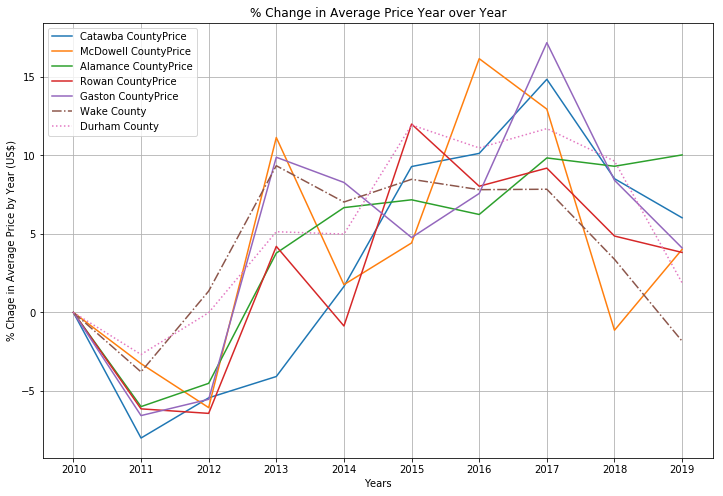

In [74]:
#Line graph for top three counties in growth
cn1 = list(df_pc['County'])

plt.figure(figsize=(12,8))

i = 0
for i in range(0,5):
    plt.plot(ychange1.index.values, ychange1[cn1[i]], label = cn1[i])
    plt.legend()
    i +=1

plt.plot(ychange1.index.values, ychange1["Wake CountyPrice"], label = "Wake County", linestyle='dashdot')
plt.plot(ychange1.index.values, ychange1["Durham CountyPrice"], label = "Durham County", linestyle='dotted')
plt.legend()

plt.legend(loc="best")
plt.xlabel("Years")
plt.ylabel("% Chage in Average Price by Year (US$)")
plt.title("% Change in Average Price Year over Year")
plt.grid()
plt.show()

In [31]:
# Calculate the average price percent changes from 2015 to 2019

changeY = []  #List to store the %change for each county

#Calculate %change for each medicine
for county in cl1:
    dataC = cyear1[county]                       #Get tumor volume data for medicine
    changeY.append(((dataC['2019']/dataC['2015'])-1)*100)   #Calculate %change for medicine and add to list (change)
    
# Store all Relevant Percent Changes into a Data Frame
priceY = pd.DataFrame({"County": cl1, "% Change": changeY}).sort_values(by ='% Change',ascending=False)
priceY.head()

,County,% Change
87,Graham CountyPrice,47.7
16,Catawba CountyPrice,45.5
7,Gaston CountyPrice,42.3
43,Granville CountyPrice,41.2
17,Alamance CountyPrice,40.3


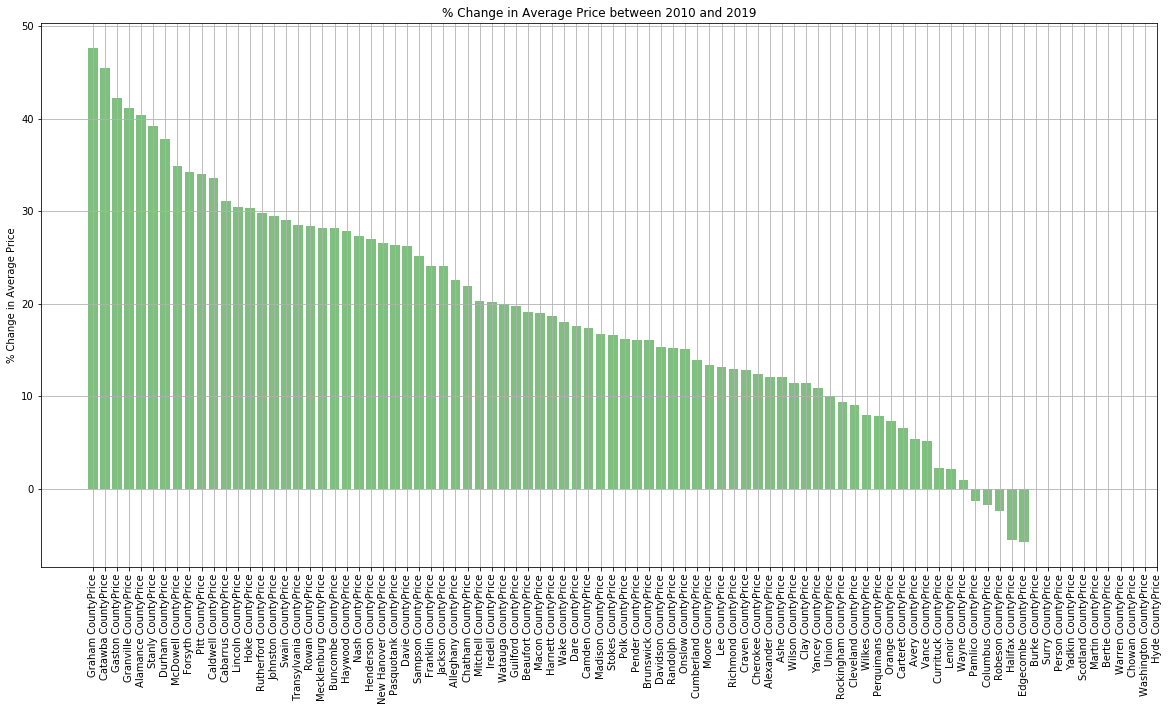

In [32]:
# Orient widths. Add labels, tick marks, etc. 

plt.figure(figsize=(20,10))

i= 0
plt.grid()
plt.bar(priceY['County'], priceY["% Change"], color = 'green', align='center', alpha=0.5)

plt.ylabel('% Change in Average Price')
plt.title('% Change in Average Price between 2010 and 2019')
plt.xticks(df_pc['County'], df_pc['County'], rotation='vertical')


plt.show()

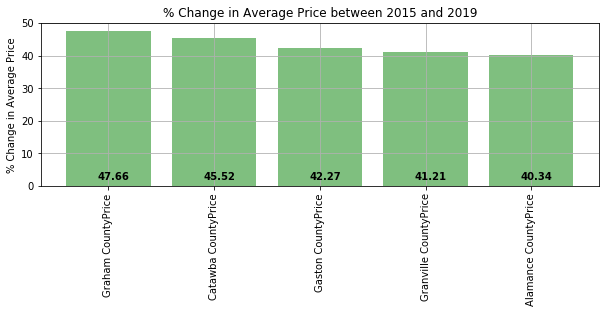

In [33]:
plt.figure(figsize=(10,3))

i= 0
j= 5
plt.grid()
plt.bar(list(priceY['County'][0:j]), list(priceY["% Change"][0:j]), color = 'green', align='center', alpha=0.5)

plt.ylabel('% Change in Average Price')
plt.title('% Change in Average Price between 2015 and 2019')
#plt.xticks(df_pc['County'][0:6], df_pc['County'][0:6], rotation='vertical')

for v in priceY['% Change'][0:j]:
    plt.text(i-0.1, 2, str(round(v,2)), color='black', fontweight='bold')
    i += 1
plt.xticks(priceY['County'][0:j], priceY['County'][0:j], rotation='vertical')

plt.savefig('top 5 growth.png')

plt.show()

In [34]:
#df3 includes data for Number of Houses for Sale per month
df3["Dates"] = cm_pric_df['Dates']
df4 = df3.set_index("Dates")


C:\Users\asi40\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
#df6 will have data for Average days in market for properties per month
df5 = cm_pric_df.filter(regex="Day")
df5['Dates'] = cm_pric_df['Dates']
df6 = df5.set_index("Dates")
df6

C:\Users\asi40\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Mecklenburg CountyDay,Wake CountyDay,Guilford CountyDay,Forsyth CountyDay,Cumberland CountyDay,Durham CountyDay,Buncombe CountyDay,Gaston CountyDay,New Hanover CountyDay,Union CountyDay,...,Hoke CountyDay,Davie CountyDay,Pasquotank CountyDay,Jackson CountyDay,Person CountyDay,Alexander CountyDay,Macon CountyDay,Cherokee CountyDay,Currituck CountyDay,Polk CountyDay
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01,151.0,185.0,155.0,172.5,143.0,117.0,nan,nan,nan,171.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-02,166.0,169.0,160.0,196.0,91.0,126.0,nan,nan,nan,203.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-03,151.0,156.0,153.0,188.0,107.0,152.0,nan,133.0,nan,184.5,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-04,155.0,158.0,166.0,231.0,133.0,156.0,nan,125.0,nan,222.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-05,132.0,157.0,160.0,186.0,110.0,101.0,nan,131.5,nan,210.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-06,119.0,125.0,124.0,127.5,102.0,103.0,nan,115.0,nan,125.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-07,115.0,117.0,125.0,134.0,107.5,112.0,177.5,119.0,nan,124.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-08,129.0,124.0,121.5,134.0,108.0,109.0,129.5,117.0,nan,145.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-09,123.0,130.0,133.0,158.0,122.0,125.0,166.0,124.0,nan,134.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


numberh

In [76]:
avgp = []
nsales = []
ndays = []
for c1 in priceY['County']:
    avgp.append(df2[c1]["2019-05"])
    c2 = c1.replace("Price", "")
    c2 = c2+"Sale"
    c3 = c1.replace("Price", "")
    c3 = c3 + "Day"
    try: 
        nsales.append(df4[c2]["2019-05"])
    except:
        nsales.append(np.nan)
    try:
        ndays.append(df6[c3]["2019-04"])
    except:
        ndays.append(np.nan)
        
priceY['Average Price'] = avgp
priceY['# Houses for Sale'] = nsales
priceY['Avg Days in Mkt'] = ndays
pd.options.display.float_format = '{:,.1f}'.format

priceY.set_index("County").head()

,% Change,Average Price,# Houses for Sale,Avg Days in Mkt
County,,,,
Graham CountyPrice,47.7,"239,000.0",10.0,nan
Catawba CountyPrice,45.5,"250,000.0",276.0,67.0
Gaston CountyPrice,42.3,"223,745.0",379.0,60.0
Granville CountyPrice,41.2,"265,000.0",71.0,83.0
Alamance CountyPrice,40.3,"225,547.5",252.0,62.0


In [40]:
print(df2["Wake CountyPrice"]["2019-05"])
print(df4["Wake CountySale"]["2019-05"])
print(df6["Wake CountyDay"]["2019-04"])
print(((df2["Wake CountyPrice"]["2019-05"]/df2["Wake CountyPrice"]["2015-01"])-1)*100)

350000.0
2044
53.0
27.80719371918934


In [78]:
print(df2["Durham CountyPrice"]["2019-05"])
print(df4["Durham CountySale"]["2019-04"])
print(df6["Durham CountyDay"]["2019-04"])
print(((df2["Durham CountyPrice"]["2019-05"]/df2["Durham CountyPrice"]["2015-01"])-1)*100)

295000.0
470.0
44.0
47.50000000000001


In [41]:
wakeStat = pd.DataFrame()
wakeStat["Average Price"] = df2["Wake CountyPrice"]["2019-05"]
wakeStat["# Houses for Sale"] = df4["Wake CountySale"]["2019-05"]
#wakeStat["# Days in Market"] = df6["Wake CountyDays"]["2019-04"]
wakeStat

,Average Price,# Houses for Sale


In [42]:
df_pc.head()

,County,% Change
39,Catawba CountyPrice,67.8
28,McDowell CountyPrice,58.6
47,Alamance CountyPrice,55.7
65,Rowan CountyPrice,51.2
50,Gaston CountyPrice,50.2


In [43]:
avgp1 = []
nsales1 = []
ndays1 = []
avgp2 = []

for c1 in df_pc['County']:
    avgp1.append(df2[c1]["2019-05"])
    avgp2.append(df2[c1]["2015-01"])
    c2 = c1.replace("Price", "")
    c2 = c2+"Sale"
    c3 = c1.replace("Price", "")
    c3 = c3 + "Day"
    try: 
        nsales1.append(df4[c2]["2019-05"])
    except:
        nsales1.append(np.nan)
    try:
        ndays1.append(df6[c3]["2019-04"])
    except:
        ndays1.append(np.nan)

df_pc['CGR 2015-2019'] = list(cgr2["% Change"])        
df_pc['Avg Price 2019-05'] = avgp1
df_pc['Avg Price 2015-01'] = avgp2
df_pc['# Houses for Sale'] = nsales
df_pc['Avg Days in Mkt'] = ndays
pd.options.display.float_format = '{:,.1f}'.format

df_pc.set_index("County").head()

,% Change,CGR 2015-2019,Avg Price 2019-05,Avg Price 2015-01,# Houses for Sale,Avg Days in Mkt
County,,,,,,
Catawba CountyPrice,67.8,13.8,"250,000.0","149,000.0",10.0,nan
McDowell CountyPrice,58.6,12.2,"277,450.0","174,950.0",276.0,67.0
Alamance CountyPrice,55.7,11.7,"225,547.5","144,900.0",379.0,60.0
Rowan CountyPrice,51.2,10.9,"189,000.0","125,000.0",71.0,83.0
Gaston CountyPrice,50.2,10.7,"223,745.0","149,000.0",252.0,62.0


In [44]:
descrDF = pd.DataFrame()
descrP = cprice2.apply(pd.DataFrame.describe, axis=1)
descrDF['Avg Price'] = descrP.loc["2019-05",:]


In [45]:
descrS = df4.apply(pd.DataFrame.describe, axis=1)
descrDF["# Houses"] = descrS.loc["2019-05",:]
descrD = df6.apply(pd.DataFrame.describe, axis=1)
descrDF["# Days"] = descrD.loc["2019-04",:]
descrDF

,Avg Price,# Houses,# Days
count,89.0,43.0,57.0
mean,"241,820.2",297.9,82.7
std,"84,324.2",515.2,35.9
min,"76,900.0",2.0,44.0
25%,"187,250.0",41.0,61.0
50%,"238,950.0",99.0,68.5
75%,"295,990.0",327.5,87.0
max,"481,000.0","2,601.0",219.0


In [46]:
countyL1 = list(priceY['County'])


Catawba County


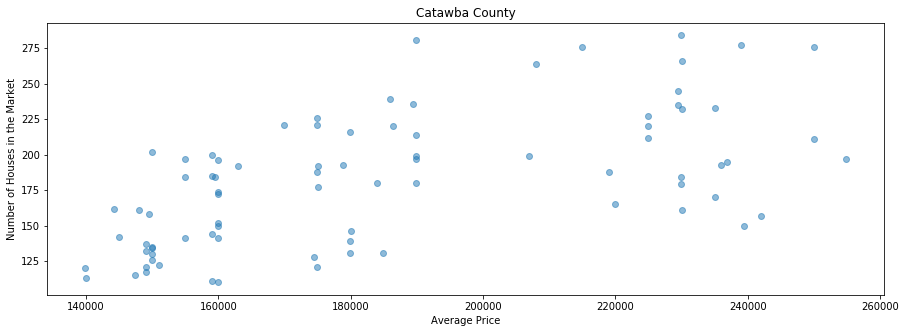

In [47]:
i = 1
cn1 = countyL1[i].replace("Price", "")
print(cn1)
pdata1 = list(cprice[cn1+"Price"])
sdata1 = list(df3[cn1+"Sale"])
ddata1 = list(cm_pric_df[cn1+"Day"])

plt.figure(figsize=(15,5))

plt.scatter(pdata1, sdata1, alpha=0.5)
plt.xlabel('Average Price')
plt.ylabel('Number of Houses in the Market')
plt.title(cn1)
plt.show()

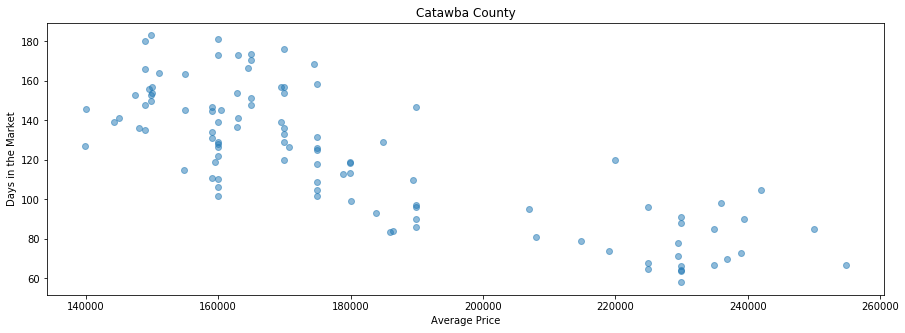

In [48]:
plt.figure(figsize=(15,5))

plt.scatter(pdata1, ddata1, alpha=0.5)
plt.xlabel('Average Price')
plt.ylabel('Days in the Market')
plt.title(cn1)
plt.show()

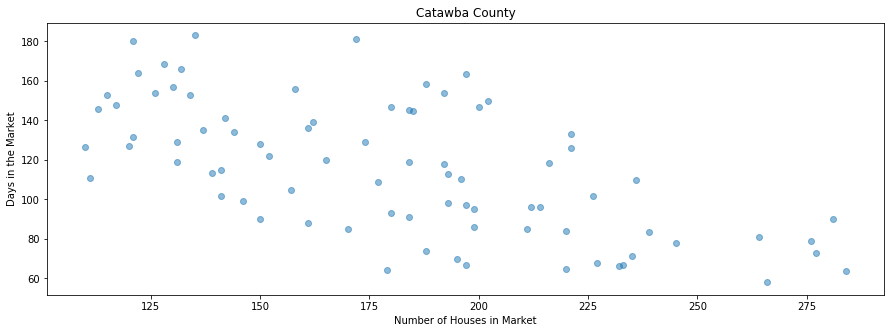

In [49]:
plt.figure(figsize=(15,5))

plt.scatter(sdata1, ddata1, alpha=0.5)
plt.xlabel('Number of Houses in Market')
plt.ylabel('Days in the Market')
plt.title(cn1)
plt.show()

In [50]:
xrange = range(1,114)

#(slope, intercept, rvalue, pvalue, stderr) = linregress(sdata,pdata)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xrange,pdata)


print (slope)
print (intercept)
print (rvalue**2)
print (pvalue)
print(stderr)



1379.4270701643488
206453.79859355246
0.9226970822116106
1.5499624262851463e-63
37.89706919508245


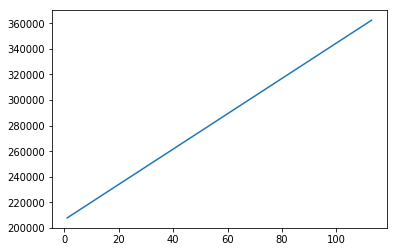

In [51]:
fit = (slope * xrange) + intercept
plt.plot(xrange, fit)
plt.show()


In [52]:
#r2 score—varies between 0 and 100%. is the proportion of the variance in the dependent variable 
#that is predictable from the independent variable(s).” Another definition is 
#“(total variance explained by model) / total variance.” So if it is 100%, the two variables are 
#perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, 
#meaning a regression model that is not valid, but not in all cases